In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
merged_df = pd.read_csv('./zip_summary.csv')
merged_df.head()

,incident_zip,total_complaints,AHV Inspection Unit,APPLIANCE,Abandoned Bike,Abandoned Vehicle,Air Quality,Animal Facility - No Permit,Animal in a Park,Animal-Abuse,...,borough,NAME,total_population,median_income,poverty_universe,below_poverty,white_alone,black_alone,hispanic,poverty_rate
0,10000,24,0,0,0,0,0,0,0,0,...,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,632,0,0,2,1,1,0,0,4,...,MANHATTAN,ZCTA5 10001,25026.0,96787.0,24140.0,2798.0,15880.0,1619.0,3925.0,0.115907
2,10002,856,0,4,2,5,1,0,8,1,...,MANHATTAN,ZCTA5 10002,74363.0,35607.0,73597.0,20257.0,23574.0,6645.0,19155.0,0.275242
3,10003,686,0,2,1,0,4,0,0,2,...,MANHATTAN,ZCTA5 10003,54671.0,129981.0,45570.0,4040.0,39951.0,2759.0,4732.0,0.088655
4,10004,265,0,0,0,1,0,0,0,0,...,MANHATTAN,ZCTA5 10004,3310.0,204949.0,3310.0,93.0,2259.0,160.0,193.0,0.028097


In [50]:
merged_df.columns

Index(['incident_zip', 'total_complaints', 'AHV Inspection Unit', 'APPLIANCE',
       'Abandoned Bike', 'Abandoned Vehicle', 'Air Quality',
       'Animal Facility - No Permit', 'Animal in a Park', 'Animal-Abuse',
       ...
       'borough', 'NAME', 'total_population', 'median_income',
       'poverty_universe', 'below_poverty', 'white_alone', 'black_alone',
       'hispanic', 'poverty_rate'],
      dtype='object', length=167)

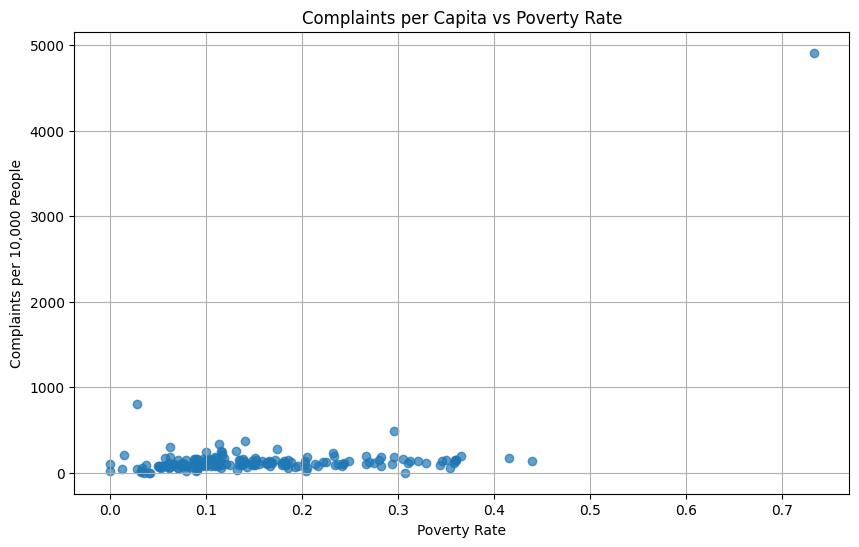

In [53]:
merged_df['complaints_per_10k'] = (merged_df['total_complaints'] / merged_df['total_population']) * 10000

plt.figure(figsize=(10,6))
plt.scatter(merged_df['poverty_rate'], merged_df['complaints_per_10k'], alpha=0.7)
plt.xlabel('Poverty Rate')
plt.ylabel('Complaints per 10,000 People')
plt.title('Complaints per Capita vs Poverty Rate')
plt.grid(True)
plt.show()

Plot 1: 


Lower poverty levels (at 40% poverty or less), tend to have stable complain rates. The plot suggests possible underreporting in higher poverty areas, likely due to lack of trust, knowledge gaps, and language barriers. There is an extreme outlier of a community with a poverty rate over .7, which hints at isolated instances of high civic engagement but does not represent the general pattern.

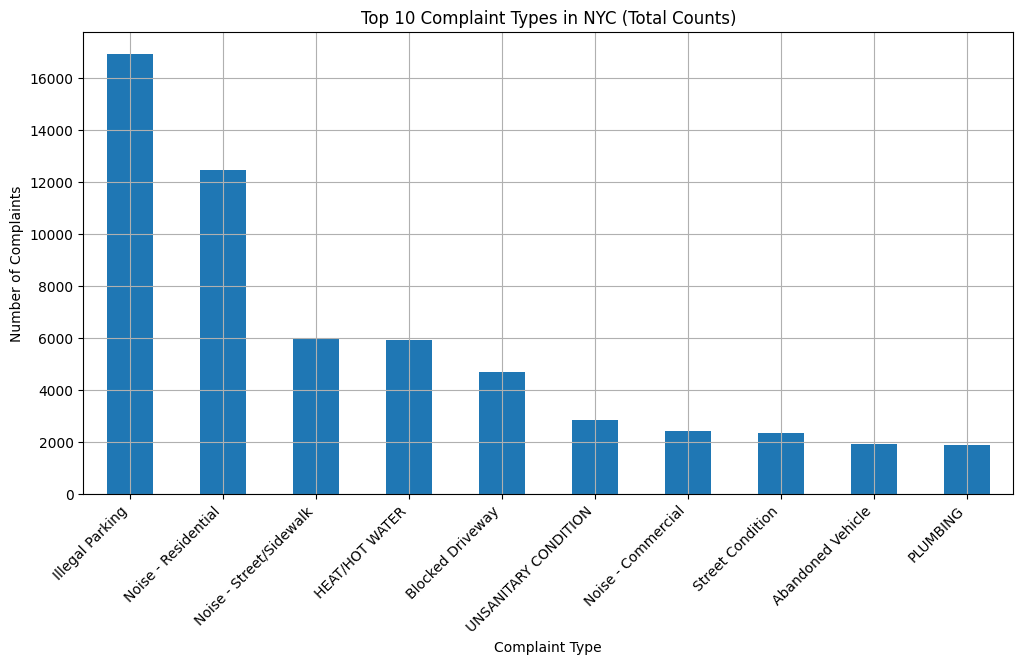

In [54]:
# top complaint types across all of nyc 
top_complaints_numeric = top_complaints.select_dtypes(include='number')

complaint_totals = top_complaints_numeric.sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
complaint_totals.plot(kind='bar')
plt.title('Top 10 Complaint Types in NYC (Total Counts)')
plt.xlabel('Complaint Type')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

Plot 2: 

As demonstrated in the plot above, Illegal Parking and Residential Noise make up a substantial portion of the complaints that the city receives, with Noise from Streets and Heat/Hot water complaints following shortly after. 

/var/folders/3n/rdmgbkdj2kdb6ykjsk2s5yrr0000gn/T/ipykernel_23162/3040454221.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


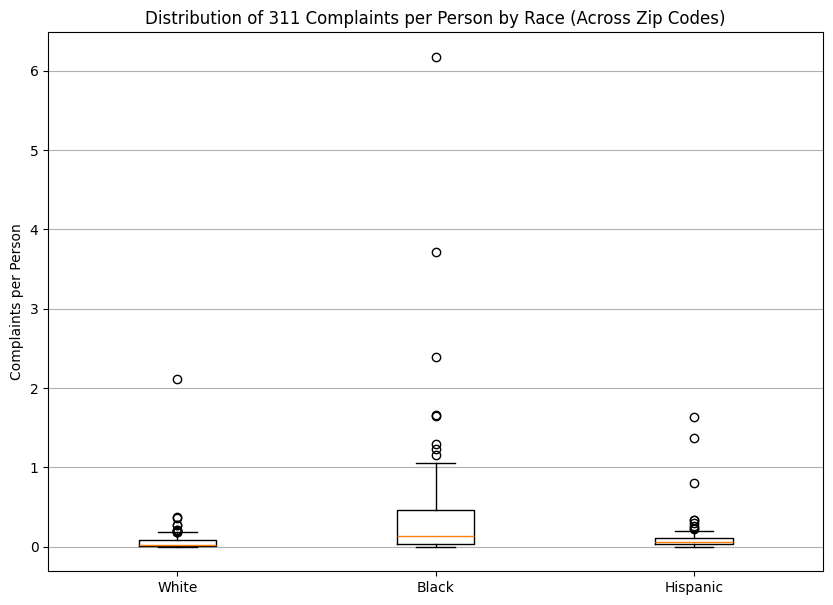

In [55]:
merged_df['complaints_per_white'] = merged_df['total_complaints'] / merged_df['white_alone']
merged_df['complaints_per_black'] = merged_df['total_complaints'] / merged_df['black_alone']
merged_df['complaints_per_hispanic'] = merged_df['total_complaints'] / merged_df['hispanic']

plt.figure(figsize=(10,7))

plt.boxplot(
    [
        merged_df['complaints_per_white'].dropna(),
        merged_df['complaints_per_black'].dropna(),
        merged_df['complaints_per_hispanic'].dropna()
    ],
    labels=['White', 'Black', 'Hispanic'],
    showmeans=True
)

plt.title('Distribution of 311 Complaints per Person by Race (Across Zip Codes)')
plt.ylabel('Complaints per Person')
plt.grid(axis='y')
plt.show()

Plot 3:

The goal of this plot is to analyze potential differences in the number of complaints received between racial groups. The plot suggests that Black-majority neighborhoods, on average, may have slightly higher civic reporting activity relative to their population size compared to White- or Hispanic-majority neighborhoods. However, significant variability exists, especially among Black-majority neighborhoods, as seen in the wider spread and presence of extreme outliers.

Our analysis is limited by the available race categories in the dataset. Some major racial groups in NYC, notably Asian-majority communities, are not represented in this graph due to lack of corresponding data fields in the merged dataset.

## Additional Quality Checks 

In [56]:
# missing values in columns 
print(merged_df.isnull().sum().sort_values(ascending=False))

poverty_rate               30
complaints_per_hispanic    14
white_alone                14
NAME                       14
total_population           14
                           ..
Green Taxi Complaint        0
Green Taxi Report           0
HEAT/HOT WATER              0
Harboring Bees/Wasps        0
Mobile Food Vendor          0
Length: 171, dtype: int64


In [57]:
# Check all zip codes have a positive total population, idealy should be 0
print((merged_df['total_population'] == 0).sum())

16


In [58]:
# check if complaints are non negative
print((merged_df['total_complaints'] < 0).sum())

0


In [59]:
# check that poverity rates are between 0 and 1
print(merged_df['poverty_rate'].describe())

count    186.000000
mean       0.151977
std        0.102181
min        0.000000
25%        0.081014
50%        0.118110
75%        0.195091
max        0.733645
Name: poverty_rate, dtype: float64


In [60]:
# check if any race counts are negative
race_cols = ['white_alone', 'black_alone', 'hispanic']
for col in race_cols:
    print(f"{col}: {(merged_df[col] < 0).sum()} negatives")

white_alone: 0 negatives
black_alone: 0 negatives
hispanic: 0 negatives


We confirmed that complaint counts are positive for all zip codes. Race-specific population counts (White, Black, Hispanic) were verified to be non-negative. Poverty rates were found to range appropriately between 0 and 1, corresponding to 0% to 100% poverty levels. No significant missingness was observed for key variables such as total_population, median_income, or total_complaints.

In [5]:
# Check ACS population estimates and coverage

def load_datasets(
        zip_path: str = "./zip_summary.csv",
        merged_path: str = "./merged_nyc_311_census_data.csv"
):
    zs = pd.read_csv(zip_path)
    df = pd.read_csv(merged_path, parse_dates = ["created_date"])
    return zs, df

zs, df = load_datasets()
print(f"ZIP summary rows: {len(zs)}, merged data rows: {len(df)}")

valid = zs[zs["NAME"].notnull()].copy()
valid["total_population"] = pd.to_numeric(valid["total_population"], errors="coerce")

# Summary statistics
desc = valid["total_population"].describe()
missing = valid["total_population"].isna().sum()
coverage = valid["total_population"].notna().mean() * 100

print("ACS total_population summary:")
print(desc.to_frame(name='value'))
print(f"Missing count: {missing}")
print(f"ZIP coverage: {coverage:.2f}%")

ZIP summary rows: 216, merged data rows: 100000
ACS total_population summary:
               value
count     202.000000
mean    42296.821782
std     28406.326433
min         0.000000
25%     21542.000000
50%     38469.000000
75%     62548.250000
max    108661.000000
Missing count: 0
ZIP coverage: 100.00%
